## Ex. 1-4)  Histogram equalization
Let's apply histogram equalizatio to images. First you need to obtain the cumulative distrubtion function, and then convert the cdf value to pixel intensity.

### Type your code here.

<function matplotlib.pyplot.show(close=None, block=None)>

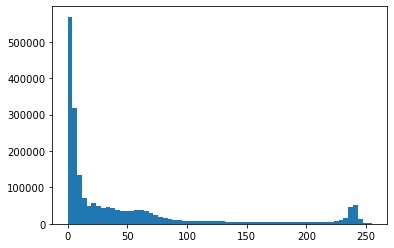

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

in_img_path = "in/dark.jpg"
img = Image.open(in_img_path)

pix = np.asarray(img)

fpix = pix.flatten()

plt.hist(fpix, bins=64)
plt.show

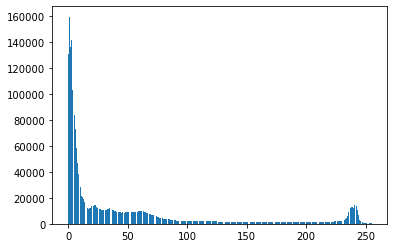

In [2]:
def create_hist(img, bins=256):
    hist = np.zeros(bins)
    # high = np.int32(np.max(img))
    # low = np.int32(np.min(img))
    high = 255
    low = 0
    width = (high - low + 1) / bins
    for pix in img:
        hist[int((pix-low)/width)] += 1
    return hist

hist = create_hist(fpix, 256)
plt.bar(np.arange(len(hist)), hist)
plt.show()

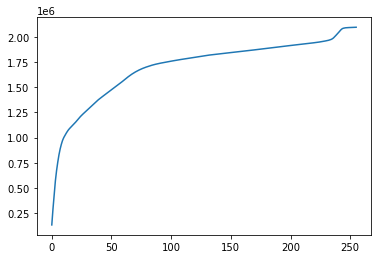

In [3]:
def create_cumulative_sum(hist):
    ans = np.zeros_like(hist)
    ans [0] = hist[0]
    for i in range(1, len(hist)):
        ans[i] = hist[i] + ans[i-1]
    return ans

cumul_sum = create_cumulative_sum(hist)
plt.plot(cumul_sum)
plt.show()

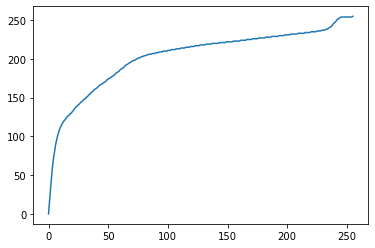

In [4]:
N = cumul_sum.max() - cumul_sum.min()
nj = (cumul_sum - cumul_sum.min())*255

sk = np.uint8(nj/N)
plt.plot(sk)
plt.show()

In [5]:
sk.shape

(256,)

In [6]:
# newpix = np.empty_like(pix)
# for i in range(pix.shape[0]):
#     for j in range(pix.shape[1]):
#         for k in range(pix.shape[2]):
#             newpix[i,j,k] = sk[pix[i,j,k]]

newpix = sk[pix]
newfpix = sk[fpix]

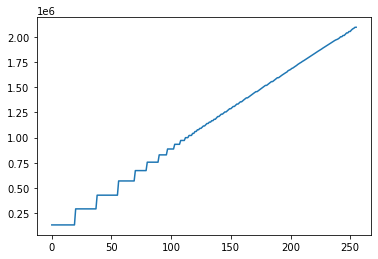

In [7]:
newcs = create_cumulative_sum(create_hist(newfpix))
plt.plot(newcs)

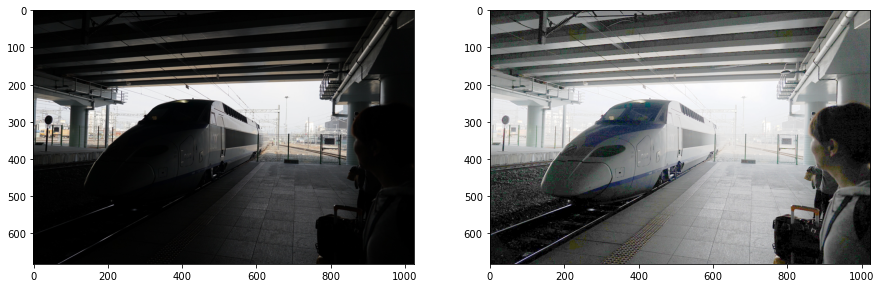

In [8]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(pix, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(newpix, cmap='gray')

plt.show(block=True)

Example code:

copyright: https://medium.com/hackernoon/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23

(array([755390., 244147.,  92257.,  62419.,  67719.,  54913.,  56710.,
         52563.,  44974.,  43759.,  54143.,  47604.,  46018.,  36880.,
         28358.,  21619.,  17660.,  13408.,  11303.,  10926.,  12277.,
          9462.,   9543.,  10217.,   8924.,   8141.,   7144.,   6737.,
          6820.,   6591.,   7746.,   6619.,   7363.,   7623.,   7345.,
          6944.,   7143.,   6807.,   7480.,   7107.,   8060.,   6823.,
          7060.,   7999.,  10415.,  15681.,  52314.,  58240.,   7644.,
          3137.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

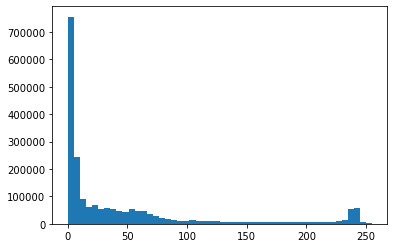

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

in_img_path = "in/dark.jpg"
img = Image.open(in_img_path)

# convert our image into a numpy array
img = np.asarray(img)

# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

In [10]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)

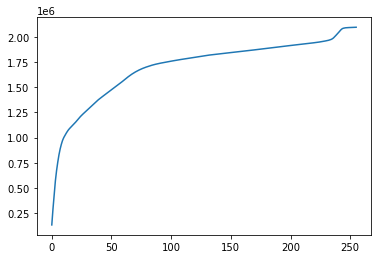

In [11]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

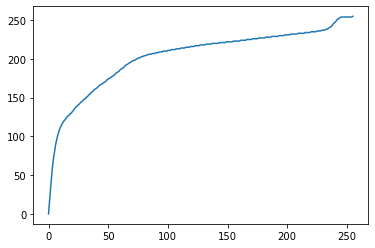

In [12]:
# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

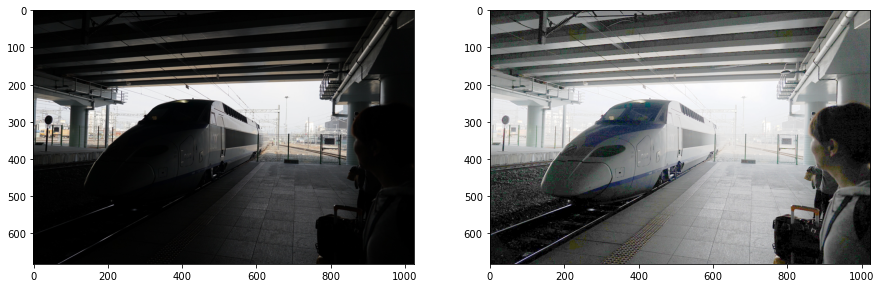

In [13]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)